# IMPORT

## import library

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [ ]:
df = pd.read_csv('SBAnational.csv', low_memory=False)

In [ ]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
282989,2960044003,EVELYN MARIE'S BRIDALS,ROCHESTER,NH,3867,GRANITE ST. ECONOMIC DEVEL COR,NH,448120,24-May-99,1999,...,N,N,NaN,17-Nov-99,"$73,000.00",$0.00,P I F,$0.00,"$73,000.00","$73,000.00"
833713,8947273009,"PASTA PAZZIA, INC.",CHICAGO,IL,60646,FIRST EAGLE BANK,IL,0,19-Jan-96,1996,...,N,Y,NaN,30-Apr-96,"$96,000.00",$0.00,P I F,$0.00,"$96,000.00","$76,800.00"
840108,9006224004,"FRESH START CREDIT SALES, LLC",ABERDEEN,SD,57401,DACOTAH BANK,SD,441120,26-Jul-05,2005,...,N,N,NaN,30-Apr-06,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$150,000.00"
104193,1766535006,Foxy Mama,Orlando,FL,32805,UMPQUA BANK,OR,448120,14-Apr-06,2006,...,N,N,23-Aug-11,31-May-06,"$25,000.00",$0.00,CHGOFF,"$13,874.00","$25,000.00","$21,250.00"
798988,8545804006,GULF COAST UNDERGROUND LLC,PASCAGOULA,MS,39567,WHITNEY BANK,MS,811310,28-Jan-05,2005,...,0,N,NaN,30-Sep-06,"$182,200.00",$0.00,P I F,$0.00,"$182,200.00","$91,100.00"


# DATA CLEANSING

In [ ]:
# tipe data awal
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

## Handling Null Values

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
## Drop kolom ChgOffDate karna tidak diperlukan
df.drop(columns=['ChgOffDate'], inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [ ]:
df.shape

(886240, 26)

## Handling Duplicated Data

In [ ]:
## check duplicated data
df.duplicated().any()

False

## Handling Data Type

In [ ]:
# Ubah kolom ApprovalDate, CharDisbursementDate, ChgOffDate menjadi datetime

df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      886240 non-null  int64         
 1   Name               886240 non-null  object        
 2   City               886240 non-null  object        
 3   State              886240 non-null  object        
 4   Zip                886240 non-null  int64         
 5   Bank               886240 non-null  object        
 6   BankState          886240 non-null  object        
 7   NAICS              886240 non-null  int64         
 8   ApprovalDate       886240 non-null  datetime64[ns]
 9   ApprovalFY         886240 non-null  object        
 10  Term               886240 non-null  int64         
 11  NoEmp              886240 non-null  int64         
 12  NewExist           886240 non-null  float64       
 13  CreateJob          886240 non-null  int64   

In [ ]:
## Cleansing data curency $ dan ,
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.replace('$', '').replace(',', ''))

## Ubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float
df[currency] = df[currency].astype(float)

In [ ]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [ ]:
df[['CreateJob', 'RetainedJob']].head()

,CreateJob,RetainedJob
0,0,0
1,0,0
2,0,0
3,0,0
4,7,7


In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [ ]:
## Handle kolom ApprovalFY
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

In [ ]:
## Hilangkan huruf A pada '1976A' lalu ubah ke int
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype(int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

In [ ]:
## Ubah tipe data 'NewExist' menjadi int
df['NewExist'] = df['NewExist'].astype(int)

df['NewExist'].unique()

array([2, 1, 0])

In [ ]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

df['NewBusiness'] = df['NewBusiness'].astype(int)
df['NewBusiness'].unique()

array([1, 0])

In [ ]:
## Ubah tipe data 'NAICS' dari numeric ke object
df['NAICS'] = df['NAICS'].astype(str)

# DATA PROCESSING

## Feature Encoding

In [ ]:
## filter value 'NewExist' hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

## filter value 'RevLineCr' hanya Y dan N
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]

## filter value 'LowDoc' hanya Y dan N
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

## filter value 'NAICS' yang hanya memiliki angka selain 0
df = df[df['NAICS'] != 0]

## filter value 'Term' harus > 0
df = df[df['Term'] > 0]

In [ ]:
print('NewExist setelah difilter:',df['NewExist'].unique())
print('RevLineCr setelah difilter', df['RevLineCr'].unique())
print('LowDoc setelah difilter', df['LowDoc'].unique())

NewExist setelah difilter: [2 1]
RevLineCr setelah difilter ['N' 'Y']
LowDoc setelah difilter ['Y' 'N']


In [ ]:
# feature encoding 'RevLineCr' & LowDoc nilai diubah Y=1, N=0
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [ ]:
df['LowDoc'].unique()

array([1, 0])

In [ ]:
df['RevLineCr'].unique()

array([0, 1])

In [ ]:
# membuat kolom baru (default) dan mengubah nilainya menjadi deafult = 1, no deafult = 0
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)

In [ ]:
df['Default'].unique()

array([0, 1])

In [ ]:
# membuat kolom baru (daysdisbursment) = AppDate-DisbDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [ ]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [ ]:
df['DisbursementFY'].unique()

array([1999, 1997, 1980, 1998, 2006, 2002, 2001, 2000, 2003, 1982, 2004,
       2071, 2005, 2009, 2007, 2008, 1981, 2072, 1978, 1979, 1996, 2010,
       1995, 2012, 1983, 1985, 1984, 2048, 1987, 1973, 1986, 2011, 1988,
       1989, 2013, 1990, 1991, 2014, 1992, 1993, 1994, 2020, 1974, 2028,
       1975, 1976, 1977, 2069, 2070])

In [ ]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [ ]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [ ]:
df[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].head()

,SBA_Appv,GrAppv,SBA_AppvPct
0,48000.0,60000.0,0.80
1,32000.0,40000.0,0.80
2,215250.0,287000.0,0.75
3,28000.0,35000.0,0.80
4,229000.0,229000.0,1.00


In [ ]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [ ]:
df.loc[(df['FranchiseCode'] <= 1), 'Franchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'Franchise'] = 1

In [ ]:
df['Franchise'].unique()

array([0., 1.])

In [ ]:
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [ ]:
df['NewBusiness'].unique()

array([1, 0])

In [ ]:
df = df.astype({'Franchise': 'int64', 'NewBusiness': 'int64', 'AppvDisbursed' :'int64' })

In [ ]:
df[['Franchise', 'NewBusiness', 'AppvDisbursed']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Franchise      609617 non-null  int64
 1   NewBusiness    609617 non-null  int64
 2   AppvDisbursed  609617 non-null  int64
dtypes: int64(3)
memory usage: 18.6 MB


In [ ]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df['industri'] = df['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping kolom industri berdasarkan 2 digit pertama pada kolom NAICS
df['industri'] = df['industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesales_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '91': 'Public_admin'
})
df['industri'].value_counts()

Retail_trade                80847
Construction                49154
Prof/Science/Tech           49151
Manufacturing               45471
Other_no_pub                44766
Wholesales_trade            34763
Healthcare/Social_assist    34482
Accom/Food_serv             34237
Admin_sup/Waste_Mgmt_Rem    21989
Trans/Ware                  15378
RE/Rental/Lease              9539
Arts/Entertain/Rec           9257
Ag/For/Fish/Hunt             7627
Information                  7345
Finance/Insurance            6327
Educational                  4001
Min/Quar/Oil_Gas             1352
Utilities                     434
Mgmt_comp                     119
Name: industri, dtype: int64

In [ ]:
df['industri_code'] = df['NAICS'].apply(lambda x: x[:2])

In [ ]:
df['industri_rate'] = df['industri_code']

df['industri_rate'] = df['industri_rate'].map({
    '21':0.08, '11':0.09,
    '62':0.10, '22':0.14,
    '92':0.15, '54':0.19,
    '42':0.19, '31':0.19,
    '32':0.16, '33':0.14,
    '81':0.20, '71':0.21,
    '72':0.22, '44':0.22,
    '45':0.23, '23':0.23,
    '56':0.24, '61':0.24,
    '51':0.25, '48':0.27,
    '49':0.23, '52':0.28,
    '53':0.29, '55':0.10,
})

In [ ]:
df['recession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY']<=2009)),1,0)

In [ ]:
df.dropna(subset=['industri', 'industri_rate'], inplace=True)

In [ ]:
df2 = pd.get_dummies(df, columns=['industri'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   LoanNr_ChkDgt                      609617 non-null  int64         
 1   Name                               609617 non-null  object        
 2   City                               609617 non-null  object        
 3   State                              609617 non-null  object        
 4   Zip                                609617 non-null  int64         
 5   Bank                               609617 non-null  object        
 6   BankState                          609617 non-null  object        
 7   NAICS                              609617 non-null  object        
 8   ApprovalDate                       609617 non-null  datetime64[ns]
 9   ApprovalFY                         609617 non-null  int64         
 10  Term                

In [ ]:
df1 = df2.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   LoanNr_ChkDgt                      609617 non-null  int64         
 1   Name                               609617 non-null  object        
 2   City                               609617 non-null  object        
 3   State                              609617 non-null  object        
 4   Zip                                609617 non-null  int64         
 5   Bank                               609617 non-null  object        
 6   BankState                          609617 non-null  object        
 7   NAICS                              609617 non-null  object        
 8   ApprovalDate                       609617 non-null  datetime64[ns]
 9   ApprovalFY                         609617 non-null  int64         
 10  Term                

## Feature selection

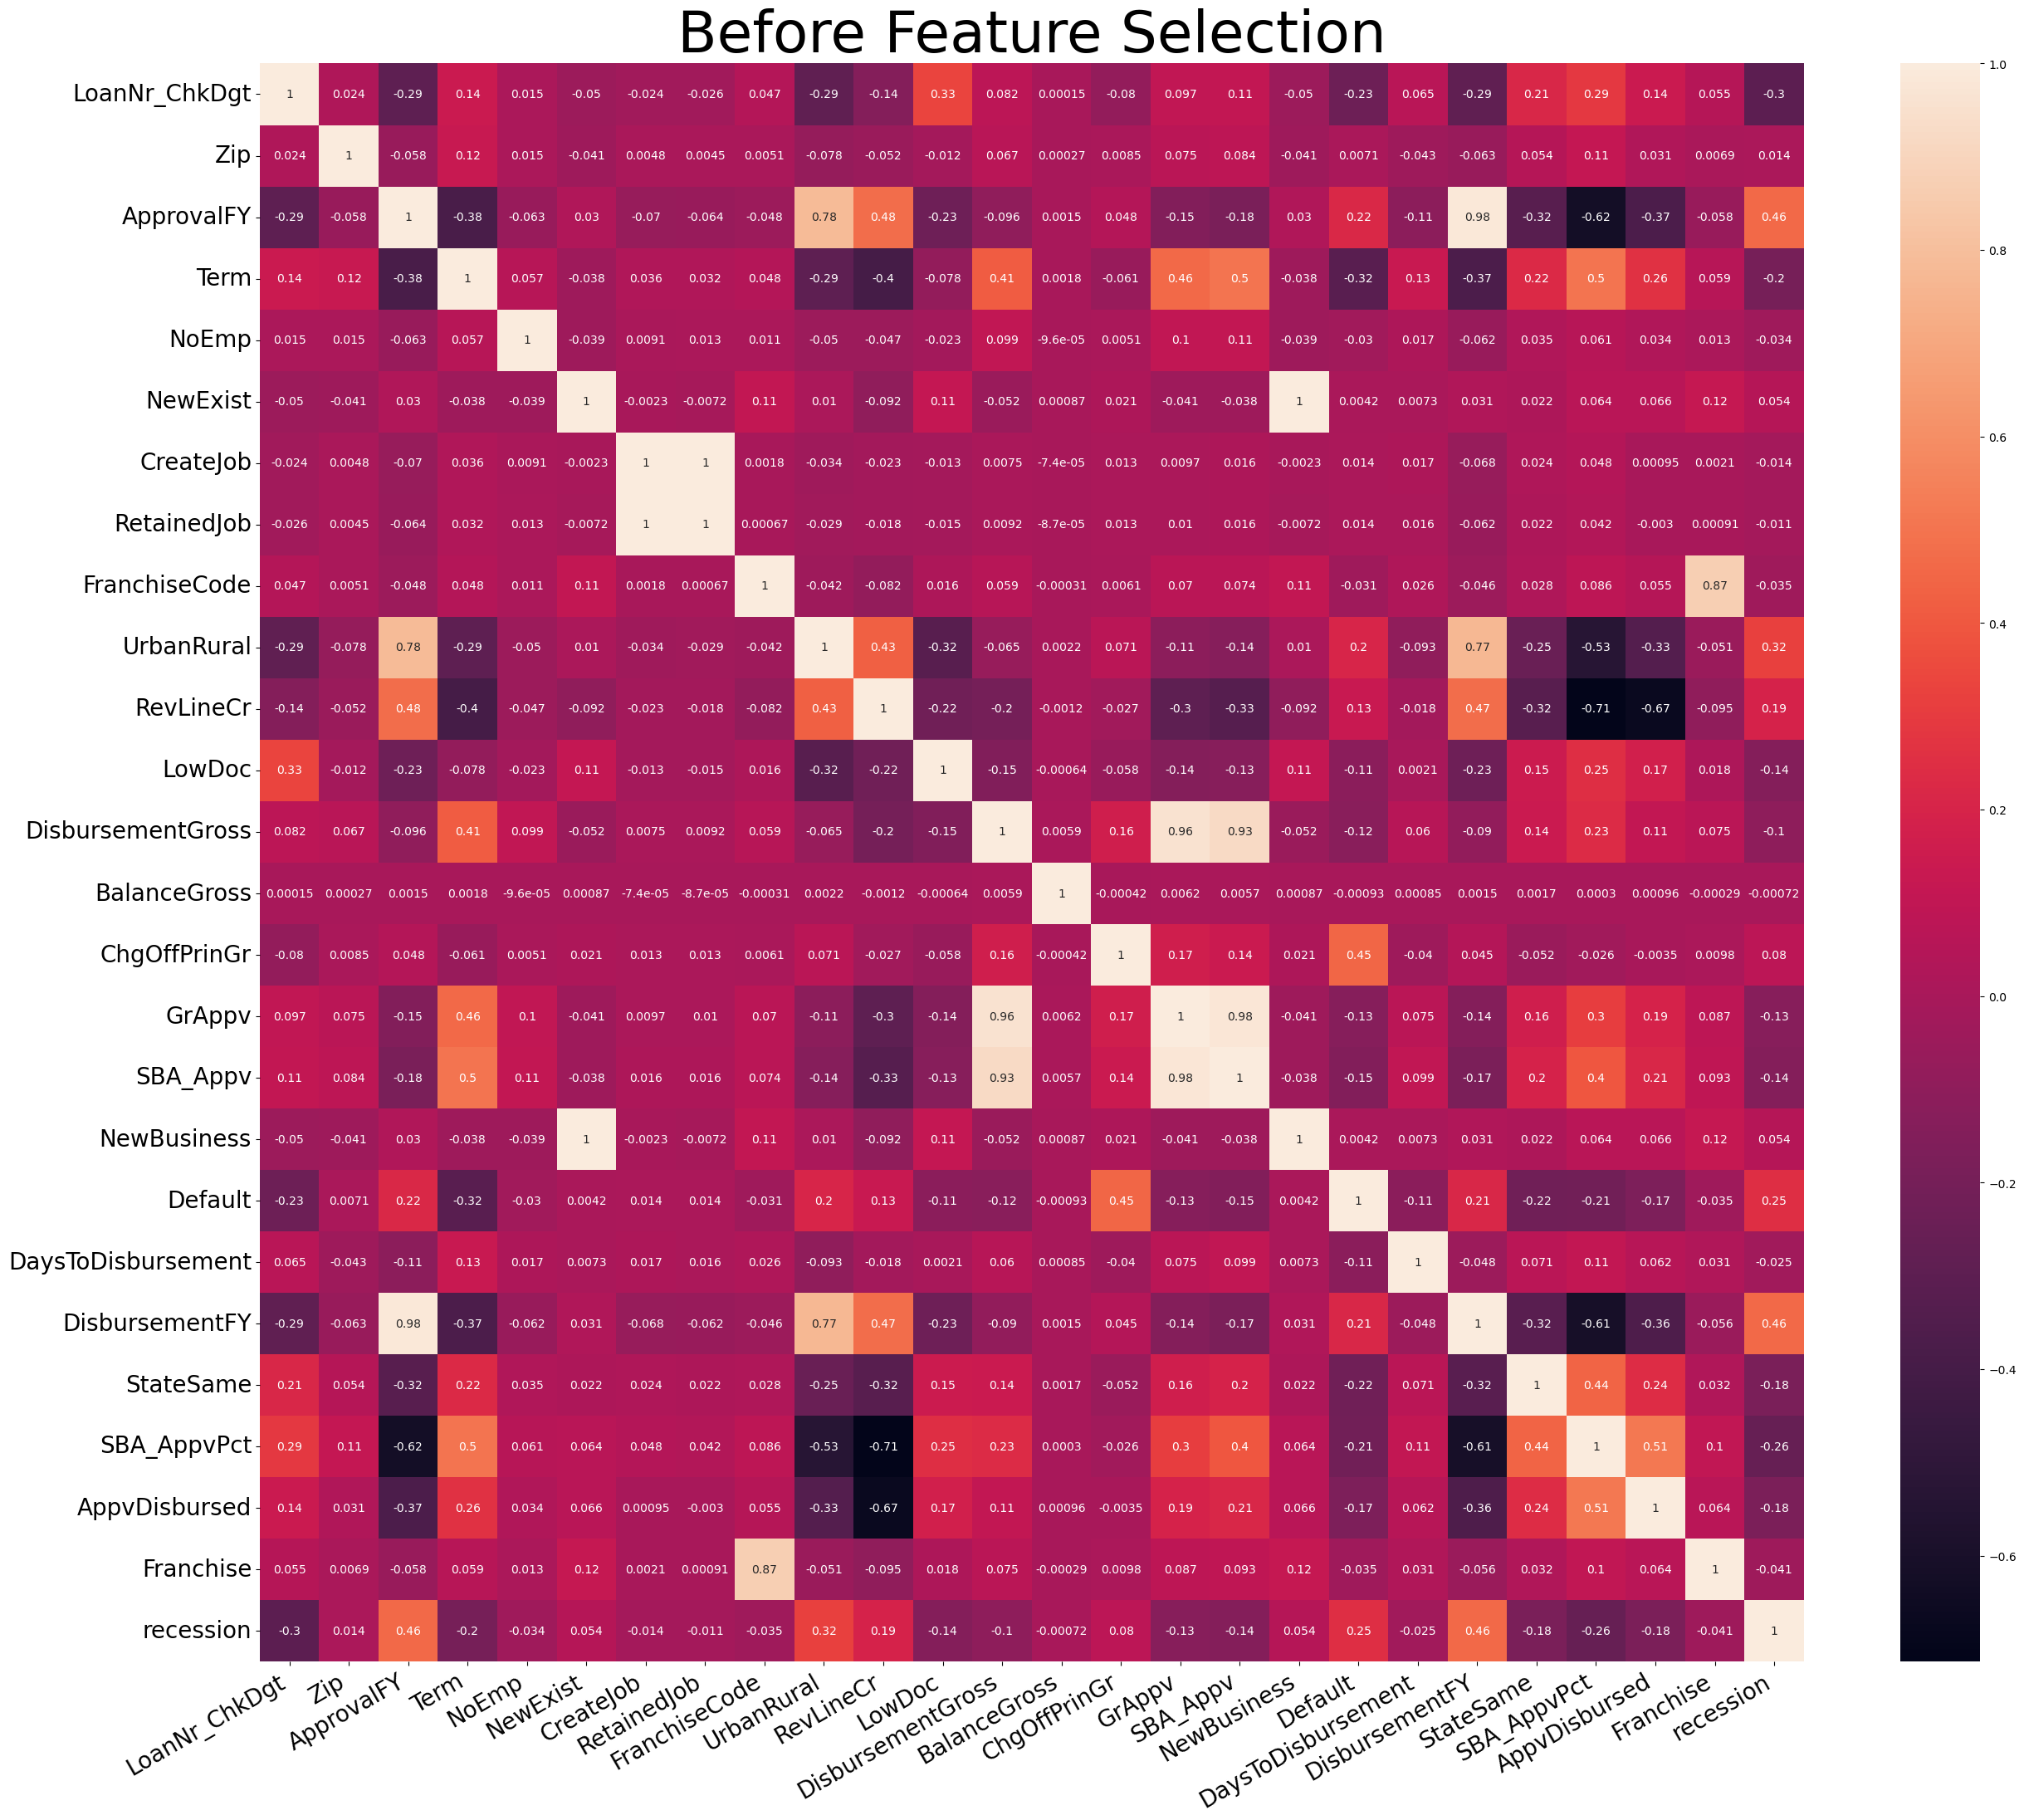

In [ ]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.title("Before Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
df1.drop(columns=[
                    'LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate',
                    'NewExist', 'FranchiseCode', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr',
                    'SBA_Appv', 'MIS_Status', 'RetainedJob', 'ApprovalFY', 'GrAppv', 'DisbursementFY',
                    'State', 'BankState'
                 ], inplace=True)

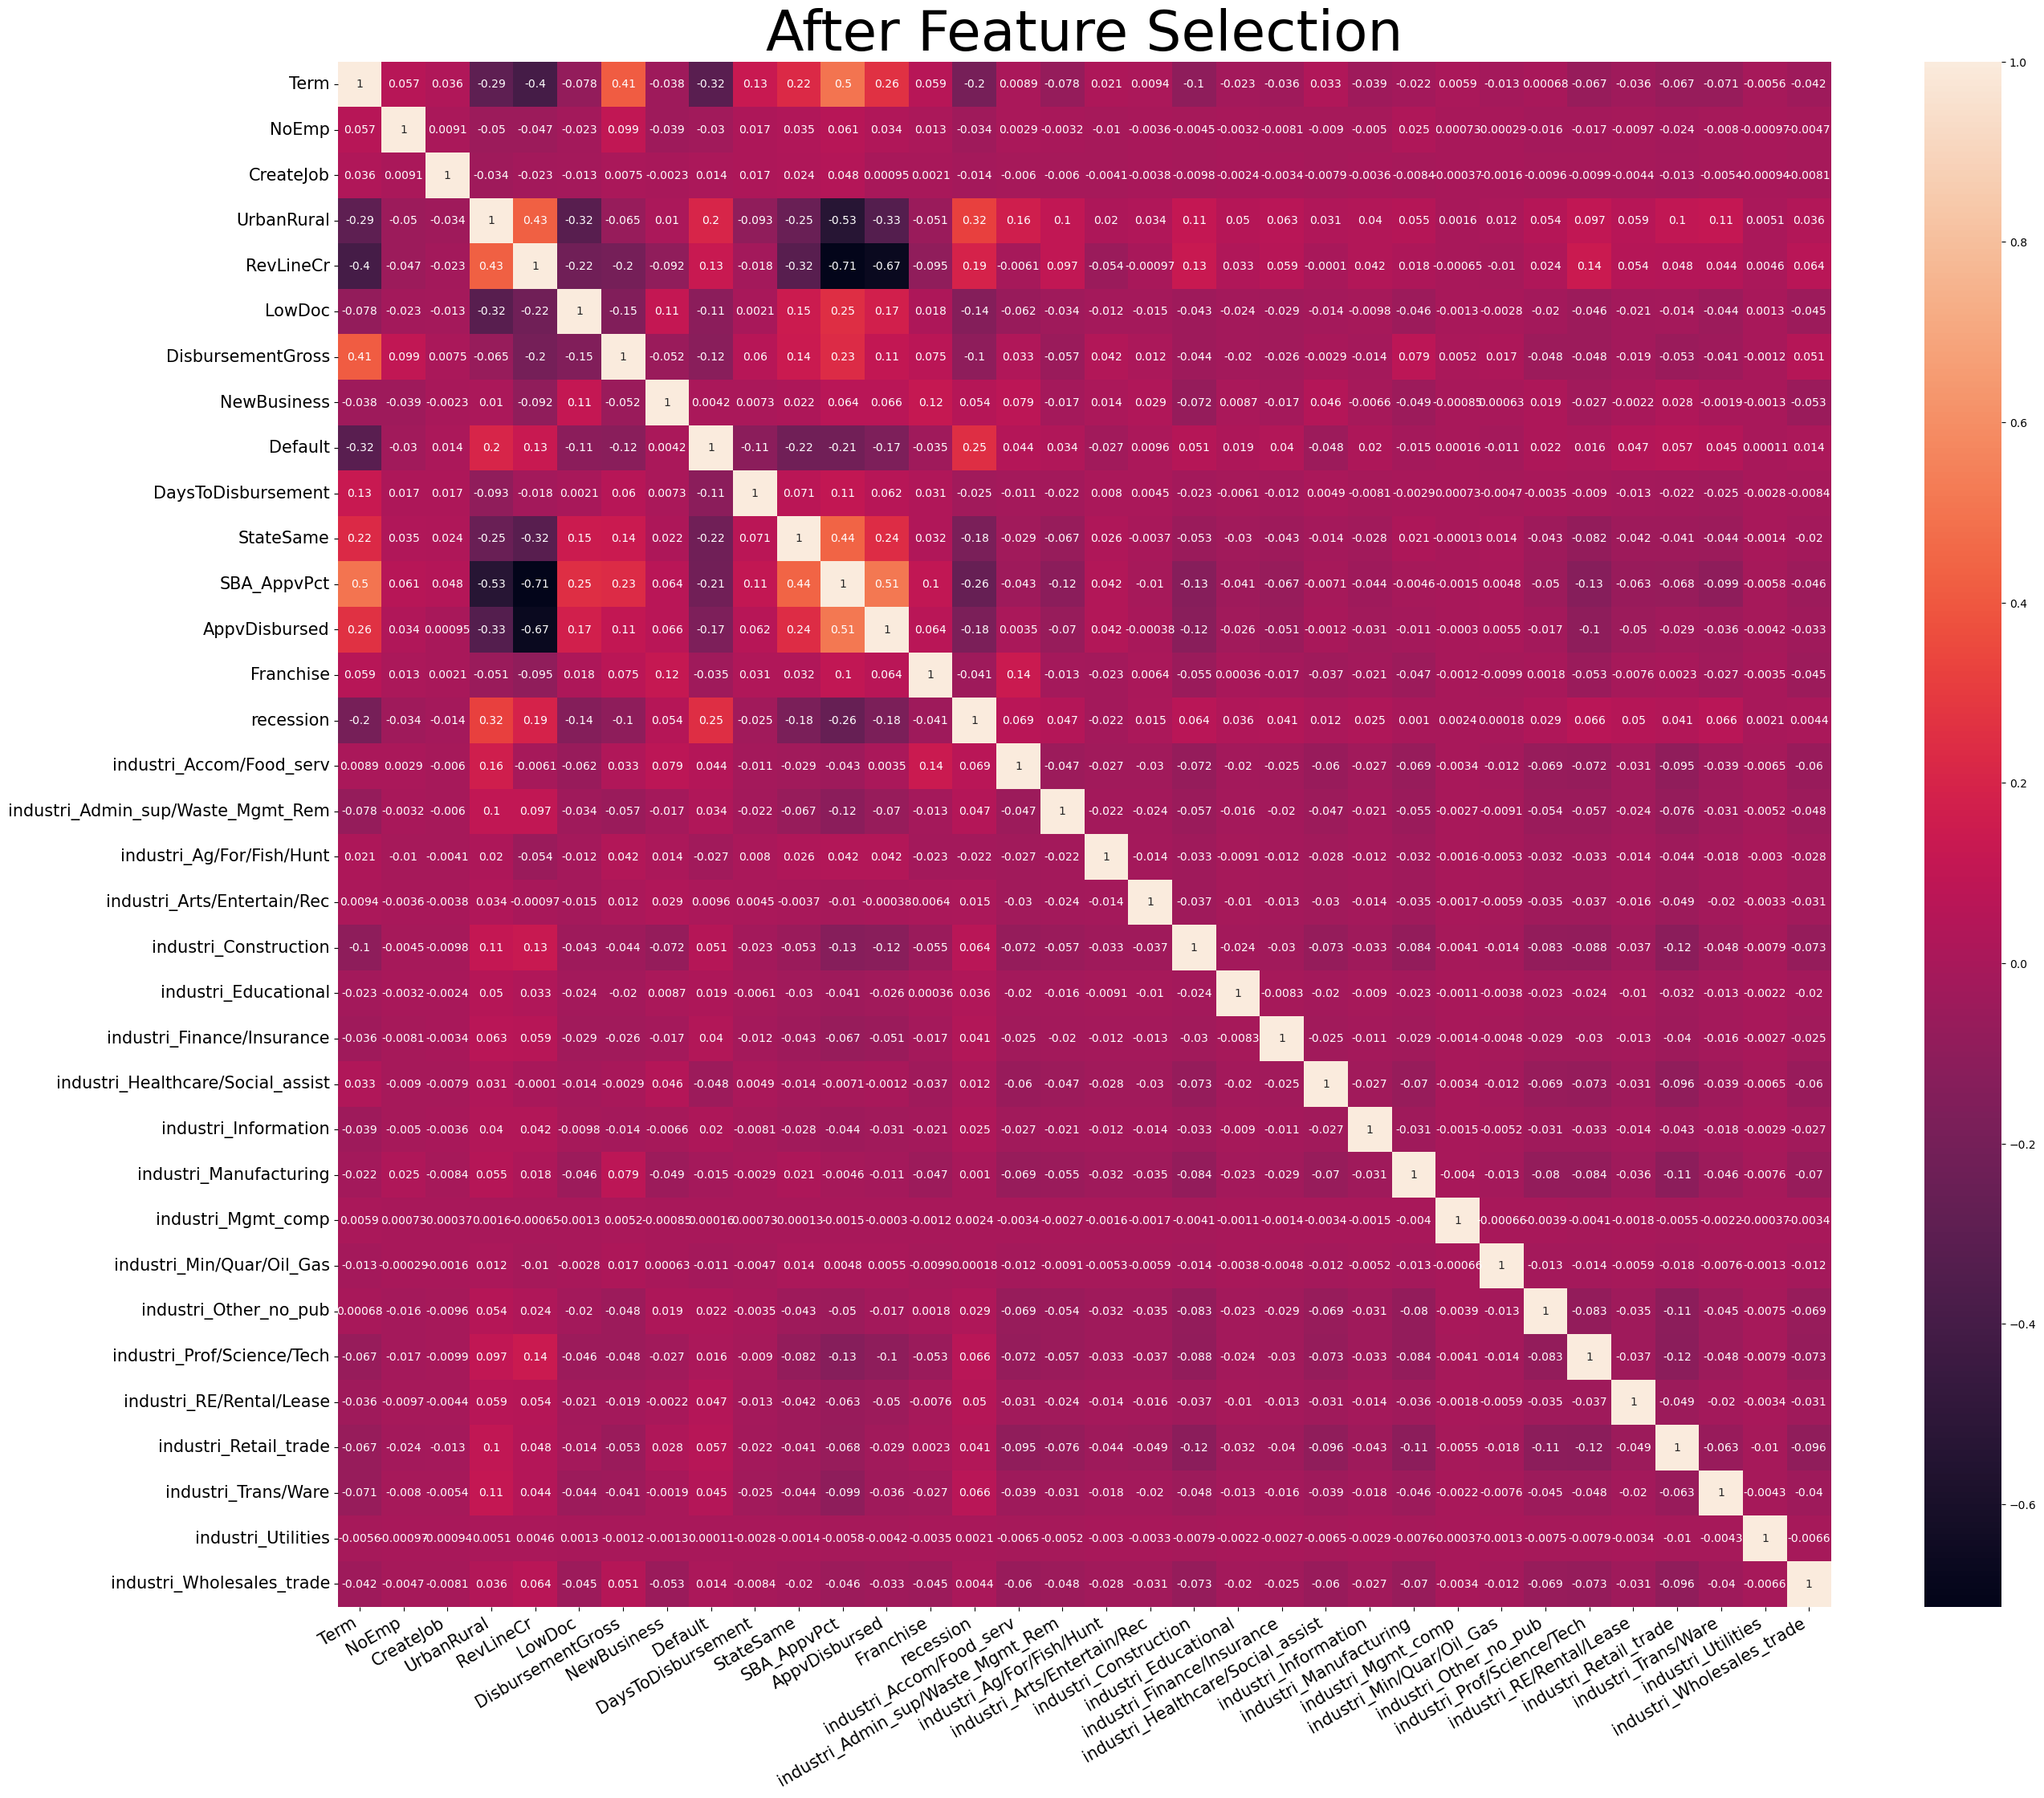

In [ ]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df1.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.title("After Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
df1.sample(5)

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,Default,DaysToDisbursement,...,industri_Manufacturing,industri_Mgmt_comp,industri_Min/Quar/Oil_Gas,industri_Other_no_pub,industri_Prof/Science/Tech,industri_RE/Rental/Lease,industri_Retail_trade,industri_Trans/Ware,industri_Utilities,industri_Wholesales_trade
38477,84,25,0,0,0,1,84000.0,0,0,123,...,0,0,0,0,0,0,0,0,0,0
110822,60,2,0,0,0,1,25000.0,1,0,30,...,0,0,0,0,0,0,0,0,0,0
321797,48,1,1,1,0,0,52500.0,1,0,8,...,0,0,0,0,0,0,0,1,0,0
859172,120,2,0,0,0,1,50000.0,0,0,153,...,0,0,0,0,0,0,0,0,0,0
422715,120,160,0,0,0,0,1000000.0,0,0,82,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Term                               609617 non-null  int64  
 1   NoEmp                              609617 non-null  int64  
 2   CreateJob                          609617 non-null  int64  
 3   UrbanRural                         609617 non-null  int64  
 4   RevLineCr                          609617 non-null  int64  
 5   LowDoc                             609617 non-null  int64  
 6   DisbursementGross                  609617 non-null  float64
 7   NewBusiness                        609617 non-null  int64  
 8   Default                            609617 non-null  int64  
 9   DaysToDisbursement                 609617 non-null  int64  
 10  StateSame                          609617 non-null  int64  
 11  SBA_AppvPct                        6096

## Feature Transformation

In [ ]:
## bandingkan metode log transformation dengan boxcox berdasarkan nilai skewnes

print('Nilai skew log transform', (np.log(df1['Term'])).skew())
print('Nilai skew boxcox transform', pd.Series(st.boxcox(df1['Term'])[0]).skew())

## karna angkanya lebih bagus boxcox maka akan digunakan metode boxcox

Nilai skew log transform -1.1493926613879553
Nilai skew boxcox transform 0.02376689851086981


In [ ]:
df1['Term_bc'] = st.boxcox(df1['Term'])[0]
df1['DisbursementGross_bc'] = st.boxcox(df1['DisbursementGross'])[0]

In [ ]:
## Melihat nilai skew sebelum dan sesudah transform
print('Nilai skew sebelum transformation', df1['Term'].skew())
print('Nilai skew sebelum transformation', df1['DisbursementGross'].skew())
print('Nilai skew sesudah transformation', df1['Term_bc'].skew())
print('Nilai skew sesudah transformation', df1['DisbursementGross_bc'].skew())

Nilai skew sebelum transformation 1.1858527369708123
Nilai skew sebelum transformation 4.73423672016642
Nilai skew sesudah transformation 0.02376689851086981
Nilai skew sesudah transformation 0.00201156855115878


In [ ]:
features_transform = ['Term','DisbursementGross', 'Term_bc', 'DisbursementGross_bc']

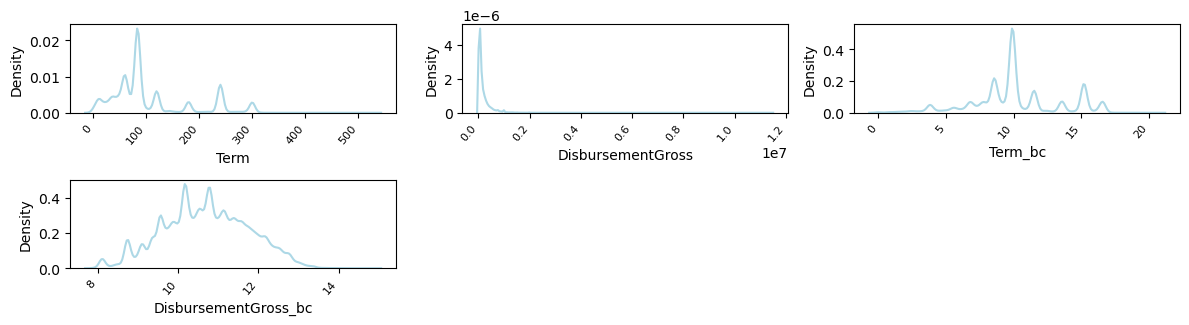

In [ ]:
features = features_transform
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
  plt.subplot(4,3, i+1)
  sns.kdeplot(df1[features[i]], color='lightblue')
  plt.xlabel(features[i])
  plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
  plt.tight_layout()

In [ ]:
## drop Term dan DisbursementGross karna sudah diganti
df1 = df1.drop(['Term', 'DisbursementGross'], axis=1)

In [ ]:
df1.describe()

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,Default,DaysToDisbursement,StateSame,SBA_AppvPct,...,industri_Min/Quar/Oil_Gas,industri_Other_no_pub,industri_Prof/Science/Tech,industri_RE/Rental/Lease,industri_Retail_trade,industri_Trans/Ware,industri_Utilities,industri_Wholesales_trade,Term_bc,DisbursementGross_bc
count,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,...,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000
mean,11.981488,11.110835,0.692194,0.324272,0.093578,0.270650,0.180482,119.568450,0.525535,0.698589,...,0.002218,0.073433,0.080626,0.015648,0.132619,0.025226,0.000712,0.057024,10.126127,10.698835
std,75.457805,285.089449,0.652545,0.468103,0.291242,0.444296,0.384589,253.403194,0.499348,0.183384,...,0.047041,0.260846,0.272260,0.124108,0.339163,0.156810,0.026672,0.231889,3.243370,1.058872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36496.000000,0.000000,0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.911259
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.571213,9.977188
50%,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.918224,10.707154
75%,11.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,126.000000,1.000000,0.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.516619,11.460186
max,9999.000000,8800.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24132.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.537492,14.826327


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   NoEmp                              609617 non-null  int64  
 1   CreateJob                          609617 non-null  int64  
 2   UrbanRural                         609617 non-null  int64  
 3   RevLineCr                          609617 non-null  int64  
 4   LowDoc                             609617 non-null  int64  
 5   NewBusiness                        609617 non-null  int64  
 6   Default                            609617 non-null  int64  
 7   DaysToDisbursement                 609617 non-null  int64  
 8   StateSame                          609617 non-null  int64  
 9   SBA_AppvPct                        609617 non-null  float64
 10  AppvDisbursed                      609617 non-null  int64  
 11  Franchise                          6096

In [ ]:
# Memisahkan features dan target
X = df1.drop(columns=['Default']) # menggunakan semua feature kecuali target
y = df1['Default']

In [ ]:
## memisahkan data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
## Standarisasi

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [ ]:
X_train.sample(5)

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,...,industri_Min/Quar/Oil_Gas,industri_Other_no_pub,industri_Prof/Science/Tech,industri_RE/Rental/Lease,industri_Retail_trade,industri_Trans/Ware,industri_Utilities,industri_Wholesales_trade,Term_bc,DisbursementGross_bc
78481,-0.105511,-0.038977,2.002320,1.441936,-0.320737,-0.609153,-0.308411,-1.052042,-1.081428,0.64388,...,-0.047161,-0.281881,-0.29625,-0.126231,2.556864,-0.161491,-0.026963,-0.246335,-0.478911,-0.157962
876490,-0.145083,-0.038977,-1.062028,-0.693512,-0.320737,1.641624,0.150994,0.950532,0.281791,0.64388,...,-0.047161,3.547591,-0.29625,-0.126231,-0.391104,-0.161491,-0.026963,-0.246335,0.500927,0.271557
802118,0.026397,0.034760,-1.062028,-0.693512,-0.320737,-0.609153,0.610400,0.950532,1.645010,0.64388,...,-0.047161,-0.281881,-0.29625,-0.126231,-0.391104,-0.161491,-0.026963,-0.246335,0.428977,0.885708
53695,-0.145083,-0.038977,0.470146,1.441936,-0.320737,-0.609153,-0.399500,-1.052042,-1.081428,0.64388,...,-0.047161,3.547591,-0.29625,-0.126231,-0.391104,-0.161491,-0.026963,-0.246335,-0.063711,-1.850620
868932,-0.131893,-0.038977,-1.062028,-0.693512,3.117821,1.641624,-0.102471,0.950532,0.554435,0.64388,...,-0.047161,-0.281881,-0.29625,-0.126231,-0.391104,-0.161491,-0.026963,-0.246335,-0.063711,-0.302887


In [ ]:
X_train.value_counts().sum()

426731

In [ ]:
X_test.value_counts().sum()

182886

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('Accuracy (Test Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Test Set) : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set) : %.2f' % recall_score(y_test, y_pred))
    print('F-1-Score (Test Set) : %.2f' % f1_score(y_test, y_pred))

    print('AUC (test-proba) : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_classification(dt)

Accuracy (Test Set) : 0.91
Precision (Test Set) : 0.75
Recall (Test Set) : 0.76
F-1-Score (Test Set) : 0.75
AUC (test-proba) : 0.85
AUC (train-proba) : 1.00
recall (crossval train): 0.9997409679618269
recall (crossval test): 0.7319245625994093


In [ ]:
#Melakukan Tuning Hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.85
Recall (Test Set) : 0.75
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.95
AUC (train-proba) : 0.97
roc_auc (crossval train): 0.9622905402663806
roc_auc (crossval test): 0.8042197796496527


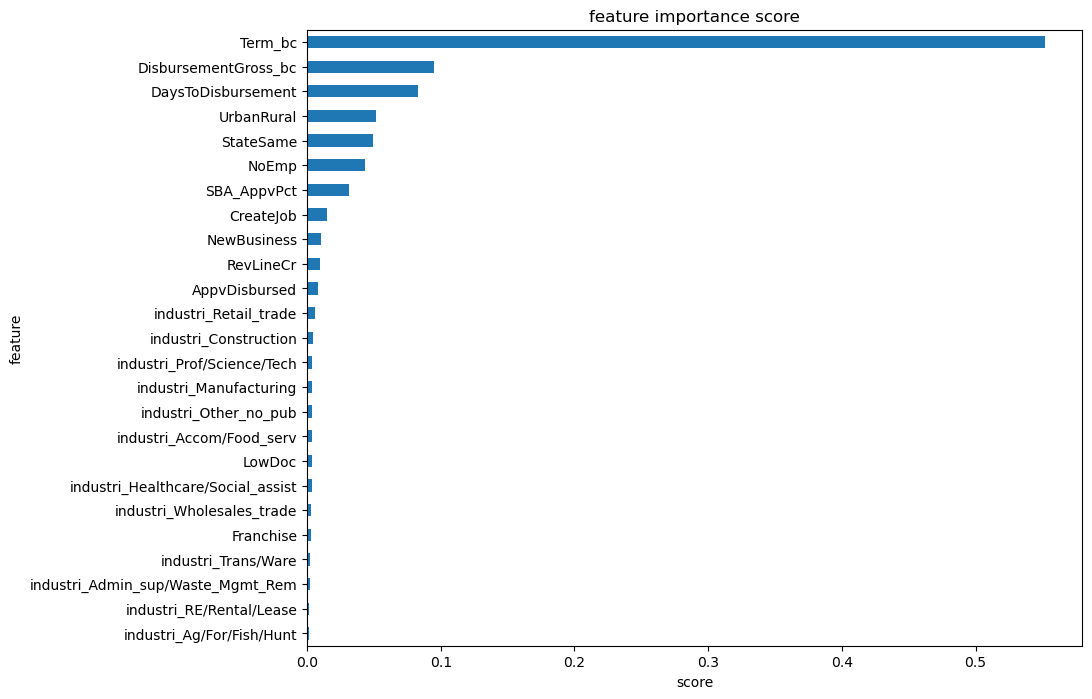

In [ ]:
show_feature_importance(dt)

**Overfit**

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

eval_classification(rf)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.87
Recall (Test Set) : 0.74
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.96
AUC (train-proba) : 1.00
recall (crossval train): 0.9996977959554647
recall (crossval test): 0.7053215178368553


In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.89
Recall (Test Set) : 0.80
F-1-Score (Test Set) : 0.84
AUC (test-proba) : 0.98
AUC (train-proba) : 0.99


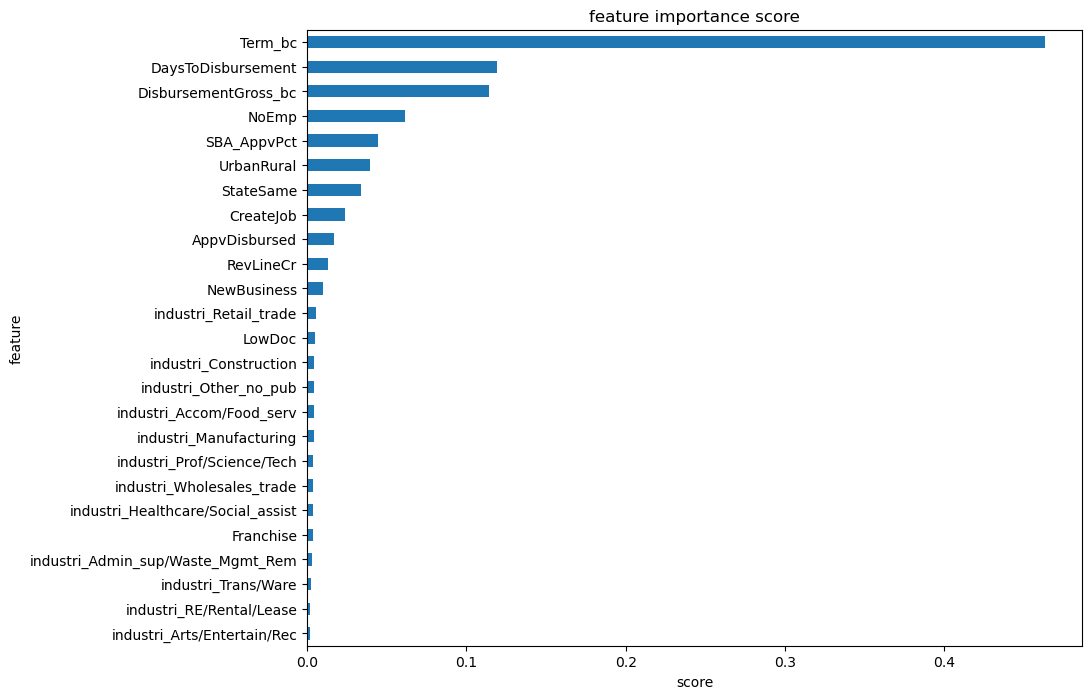

In [ ]:
show_feature_importance(rf)

## LR

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set) : 0.85
Precision (Test Set) : 0.69
Recall (Test Set) : 0.33
F-1-Score (Test Set) : 0.44
AUC (test-proba) : 0.84
AUC (train-proba) : 0.85
recall (crossval train): 0.2946330379459214
recall (crossval test): 0.296359918200409


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set) : 0.85
Precision (Test Set) : 0.68
Recall (Test Set) : 0.32
F-1-Score (Test Set) : 0.43
AUC (test-proba) : 0.84
AUC (train-proba) : 0.84
roc_auc (crossval train): 0.8345286334273052
roc_auc (crossval test): 0.8277443347101157


## XGBOOST

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.87
Recall (Test Set) : 0.81
F-1-Score (Test Set) : 0.84
AUC (test-proba) : 0.97
AUC (train-proba) : 0.98
recall (crossval train): 0.8325380595319245
recall (crossval test): 0.7636900704385367


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.88
Recall (Test Set) : 0.86
F-1-Score (Test Set) : 0.87
AUC (test-proba) : 0.98
AUC (train-proba) : 0.99
roc_auc (crossval train): 0.985816032728138
roc_auc (crossval test): 0.9304209235511269


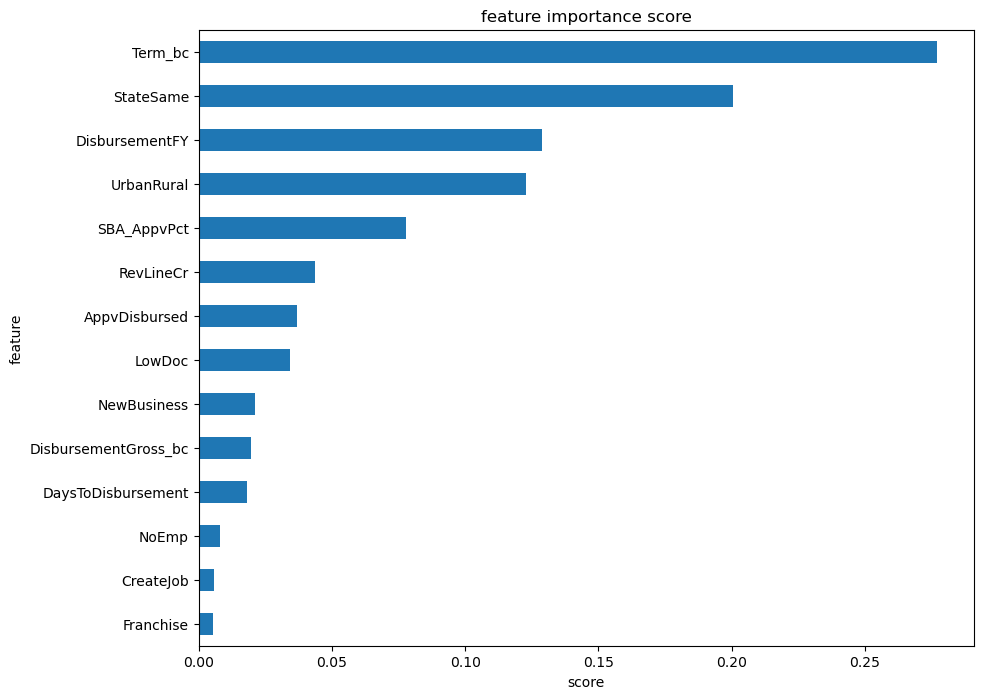

In [ ]:
show_feature_importance(xg)

## ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_classification(abc)

Accuracy (Test Set) : 0.91
Precision (Test Set) : 0.78
Recall (Test Set) : 0.67
F-1-Score (Test Set) : 0.72
AUC (test-proba) : 0.94
AUC (train-proba) : 0.94
recall (crossval train): 0.6793183367416497
recall (crossval test): 0.6577959554646672


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 200)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.5, stop = 2.0, num = 200)],
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abc = AdaBoostClassifier(random_state=42)
abc_tuned = RandomizedSearchCV(abc, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
abc_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(abc_tuned)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.82
Recall (Test Set) : 0.78
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.96
AUC (train-proba) : 0.96
roc_auc (crossval train): 0.9625714891968344
roc_auc (crossval test): 0.8839696571930705


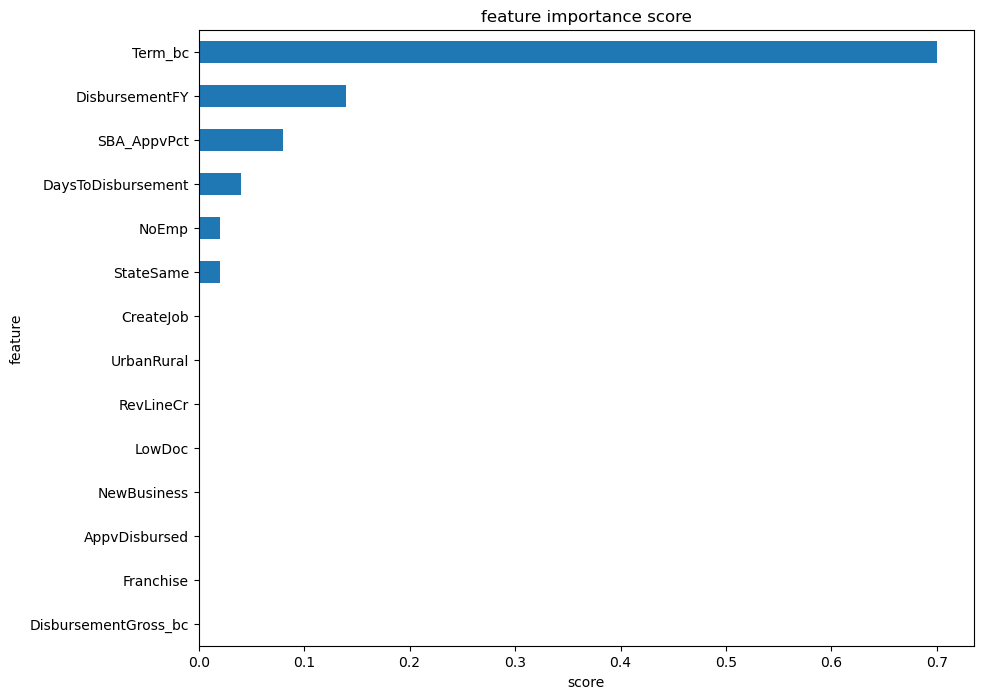

In [ ]:
show_feature_importance(abc)

## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_classification(gbc)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.85
Recall (Test Set) : 0.73
F-1-Score (Test Set) : 0.79
AUC (test-proba) : 0.95
AUC (train-proba) : 0.96
recall (crossval train): 0.7380504430811179
recall (crossval test): 0.704967052942513


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = {
                    'learning_rate': [0.1,0.5],
                    'max_depth' : [3, 10],
                    'min_samples_split' : [2,5],
                    'n_estimators' : [100,200]
                  }
# Init model
gbc = GradientBoostingClassifier(random_state=42)
gbc_tuned = RandomizedSearchCV(gbc, hyperparameters, random_state=42, cv=5, scoring='roc_auc', n_jobs=-1)
gbc_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(gbc_tuned)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.88
Recall (Test Set) : 0.85
F-1-Score (Test Set) : 0.87
AUC (test-proba) : 0.98
AUC (train-proba) : 0.99
roc_auc (crossval train): 0.9746414316802143
roc_auc (crossval test): 0.9045571662667402
